In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
cleaned_df = pd.read_csv("/content/cleaned_data.csv")

In [ ]:
cleaned_df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17.03,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury
1,17.03,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury
2,17.03,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Unknown,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1.10,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1.10,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury


<Axes: >

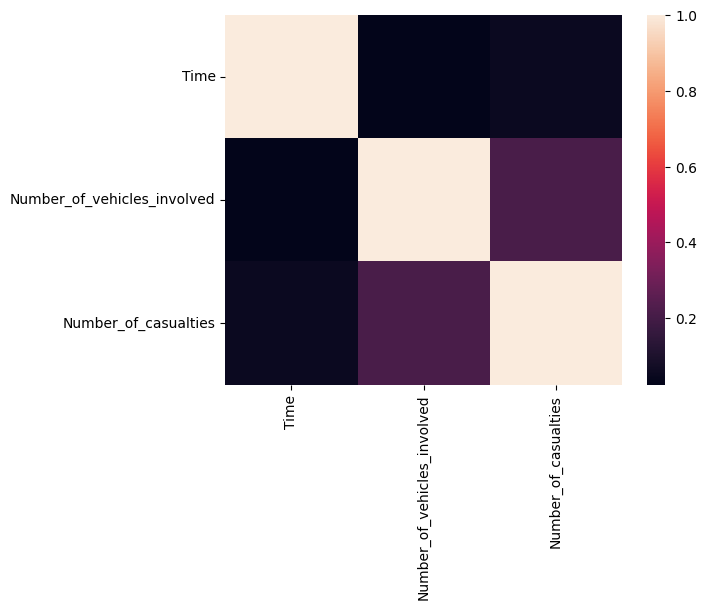

In [ ]:
correlation = cleaned_df.select_dtypes('number').corr()
sns.heatmap(correlation)

In [ ]:
# drop columns of effect of  accident
x_columns = cleaned_df.drop(columns =  ['Type_of_collision','Casualty_class', 'Number_of_casualties', 'Number_of_vehicles_involved',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'])

In [ ]:
X = x_columns
y = cleaned_df['Accident_severity']

# Convert categorical variables into numeric using Label Encoding
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le  # Save the encoder for later use

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the labels in the training set
y_train_encoded = le.fit_transform(y_train)

# Transform the labels in the test set
y_test_encoded = le.transform(y_test)

# If you are using resampled data from SMOTE
y_train_resampled_encoded = le.fit_transform(y_train_resampled)

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled_encoded)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)



In [ ]:
xgb_model = XGBClassifier(random_state=42)

# Train the model using encoded labels
xgb_model.fit(X_train_resampled, y_train_resampled_encoded)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

# Inverse transform the predictions back to original labels for evaluation
y_pred_original = le.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_original)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_original))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_original))

Accuracy: 0.7691474966170501

Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        52
Serious Injury       0.22      0.16      0.19       552
 Slight Injury       0.84      0.89      0.87      3091

      accuracy                           0.77      3695
     macro avg       0.36      0.35      0.35      3695
  weighted avg       0.74      0.77      0.75      3695


Confusion Matrix:
 [[   0    5   47]
 [   4   89  459]
 [  35  303 2753]]


In [ ]:
# Create a DataFrame for the actual and predicted values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_original
})

# Display the first few rows of the DataFrame
print(predictions_df.head(10))


               Actual       Predicted
4281    Slight Injury   Slight Injury
4010    Slight Injury   Slight Injury
1022   Serious Injury   Slight Injury
8775    Slight Injury   Slight Injury
10000   Slight Injury   Slight Injury
360     Slight Injury   Slight Injury
5865    Slight Injury  Serious Injury
11287   Slight Injury   Slight Injury
5641   Serious Injury   Slight Injury
9068     Fatal injury   Slight Injury


In [ ]:
predictions_df['Predicted'].nunique()

3

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save your trained model
model_filename = 'rf_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(rf_model, model_file)